In [2]:
#Importar paquetes necesarios

import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [5]:
#Leer los datos

data = pd.read_csv('iris.data', names = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'Class'])
data.head(8)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


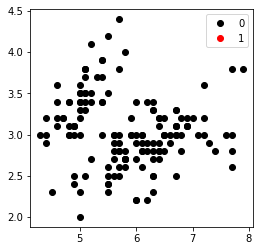

In [34]:
#Definición features de interes

s_l = data['sepal length in cm']
s_w = data['sepal width in cm']
y = data['Class']

#Implementación máscaras
class_0 = y != 'Iris-setosa'
class_1 = y == 'Iris-setosa'

#Graficamos los puntos con sus correspondientes clases
fig = plt.figure(figsize=(4,4))
plt.plot(s_l[class_0],s_w[class_0],'o', c='black', label='0')
plt.plot(s_l[class_1],s_w[class_1],'o', c='red', label='1')
plt.legend()
plt.show()

In [30]:
#Función perceptron
def f(x):
 return -(b + w_1*x)/w_2

In [26]:
#Definimos nuestra función de activación Sigmoide
def act(z):
  return 1/(1 + np.exp(-z))

Epoch [1/15], bias: -0.5, w1: -2.55, w2: -1.75


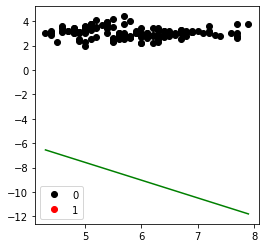

Epoch [2/15], bias: -0.5, w1: -2.55, w2: -1.75


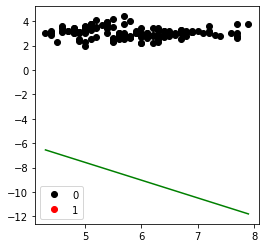

Epoch [3/15], bias: -0.5, w1: -2.55, w2: -1.75


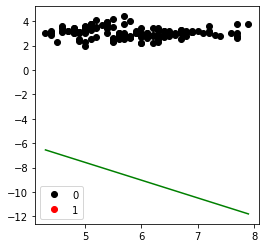

Epoch [4/15], bias: -0.5, w1: -2.55, w2: -1.75


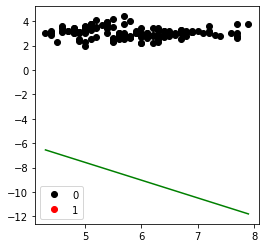

Epoch [5/15], bias: -0.5, w1: -2.55, w2: -1.75


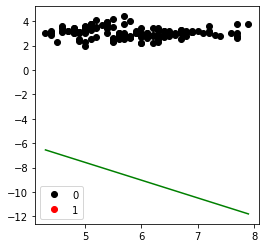

Epoch [6/15], bias: -0.5, w1: -2.55, w2: -1.75


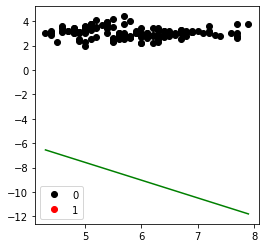

Epoch [7/15], bias: -0.5, w1: -2.55, w2: -1.75


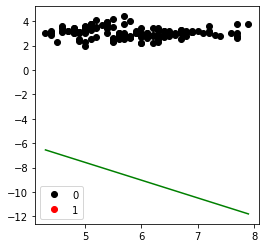

Epoch [8/15], bias: -0.5, w1: -2.55, w2: -1.75


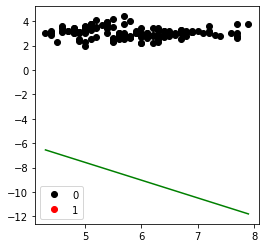

Epoch [9/15], bias: -0.5, w1: -2.55, w2: -1.75


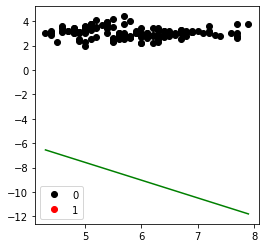

Epoch [10/15], bias: -0.5, w1: -2.55, w2: -1.75


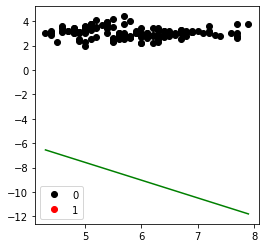

Epoch [11/15], bias: -0.5, w1: -2.55, w2: -1.75


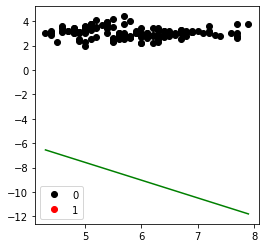

Epoch [12/15], bias: -0.5, w1: -2.55, w2: -1.75


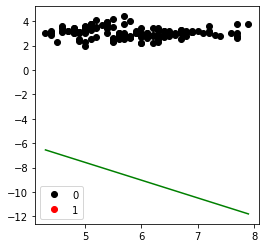

Epoch [13/15], bias: -0.5, w1: -2.55, w2: -1.75


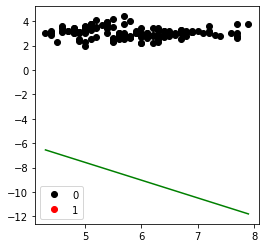

Epoch [14/15], bias: -0.5, w1: -2.55, w2: -1.75


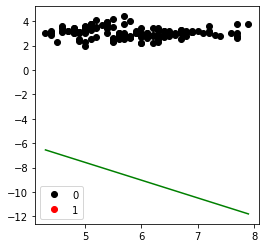

Epoch [15/15], bias: -0.5, w1: -2.55, w2: -1.75


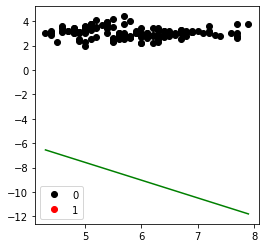

In [31]:
#Definimos el Perceptron

# Inicializamos los pesos en 0
b = 0
w_1 = 0
w_2 = 0

# Inicializamos el número de épocas y la rata de aprendizaje
n_epochs = 15 # Número de épocas
n = 0.5      # Tasa de aprendizaje

# Entrenamos el Perceptron
for epoch in range(n_epochs):
  for i,j,k in zip(s_l,s_w,y):
    
    # Función de Suma
    z = i*w_1 + j*w_2 + b

    # Función de Activación
    sig_z = act(z)

    # Evaluamos la salida (output)
    if sig_z >= 0.5:
      out = 1
    if sig_z < 0.5:
      out = 0
    
    # Calculamos el error
    error = k - out

    # Actualizamos los pesos
    b = b + n*error
    w_1 += n*error*i
    w_2 += n*error*j

  print('Epoch [{}/{}], bias: {}, w1: {}, w2: {}'.format(epoch+1,n_epochs,b,w_1,w_2))

  fig = plt.figure(figsize=(4,4))
  plt.plot(s_l[class_0],s_w[class_0],'o', c='black', label='0')
  plt.plot(s_l[class_1],s_w[class_1],'o', c='red', label='1')
  plt.plot(np.sort(s_l),f(np.sort(s_l)),'-', c='green',)
  plt.legend()
  plt.show()



# Análisis

El código tiene un proble a partir de la linea: y = data['Class'], ya que por alguna razón que no logro descifrar ni corregir, la columna Class, que debería tener los nombres de la clase de flor, se convierte en una lista de puros ceros al leerla de esa forma, solamente ceros sin importar la clase de flor (es decir no está un número diferente para cada tipo), por lo que se tiene que todos los targets son 0 y el perceptron, por obvias razones, no funciona bien así. En la primera gráfica se puede ver dónde iría la linea, ya que la división es fácil para los dos features elegidos, que son sepalo length y sepalo width. 

También intenté implementar la segunda parte con el Perceptron de multiples capas visto en clase pero los resultados fueron malos muy malos, debido al mismo problema de lectura de los datos, que en verdad no encontré cómo corregir.
